### Importando as bibliotecas

In [228]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [229]:
# abrindo o bando de dados
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Análise exploratória

In [230]:
# ver quais valores temos na coluna 'Survived'
df['Survived'].drop_duplicates()

0    0
1    1
Name: Survived, dtype: int64

In [231]:
# tupla (lista que não pode ser alterada) mostrando os valores do df
df.shape

(891, 12)

In [232]:
# pegando as colunas numéricas e faz alguns calculos 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [233]:
# vendo os tipos de dados
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [234]:
# ver os nomes das colunas e os valores não nulos (alem das informações da quantidade de memória)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [235]:
# contando valores repetidos
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Ver se tem valores fora do padrão

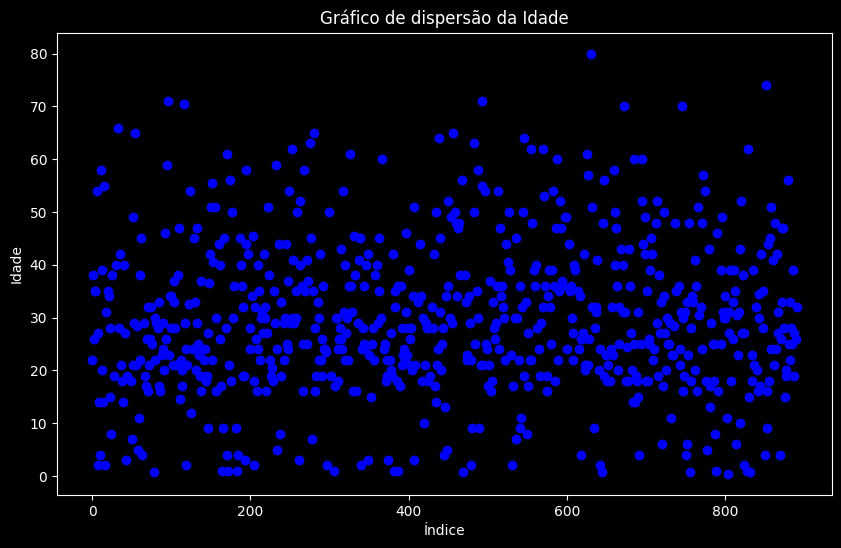

In [236]:
# criando gráfico de dispersão
plt.figure(figsize=(10,6))
plt.scatter(range(len(df['Age'])), df['Age'], color='blue')
plt.title('Gráfico de dispersão da Idade')
plt.xlabel('Índice')
plt.ylabel('Idade')
plt.style.use('dark_background')
plt.show()

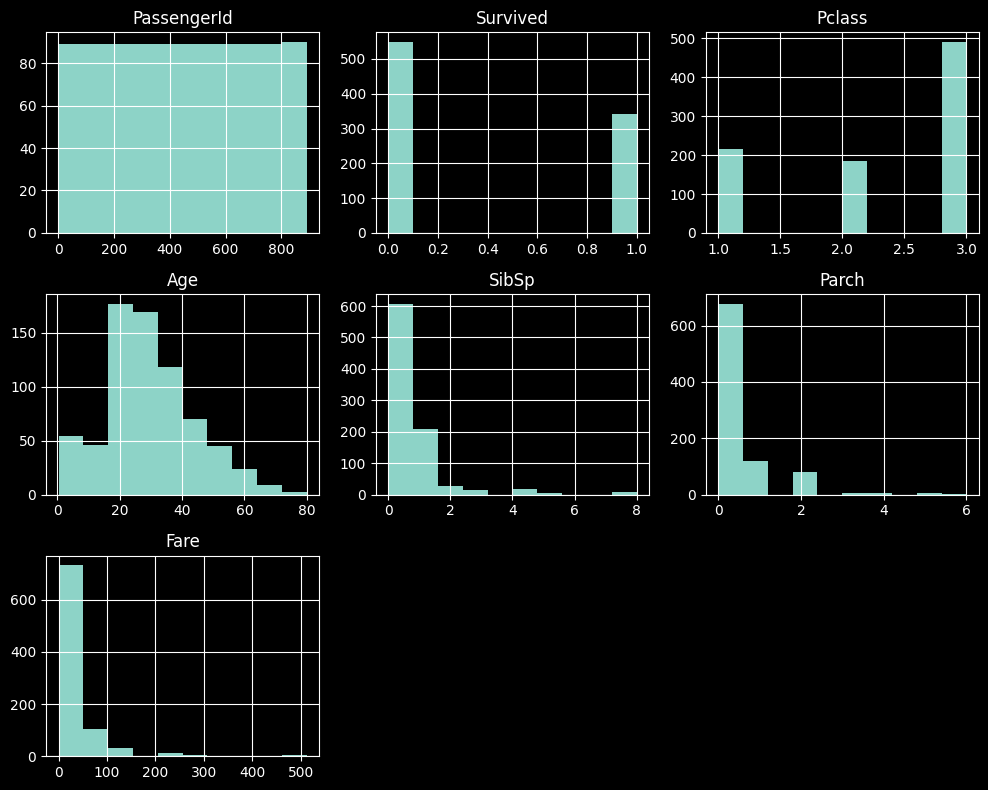

In [237]:
# visualizar as distribuições das variáveis numéricas
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.style.use('dark_background')
plt.show()

### Calculando Matriz de correlação 

In [238]:
# Pegando as colunas numéricas
df_numerico = df.select_dtypes(include=['int64', 'float64'])

In [239]:
# calculando a matriz de correlação
matrix_correlacao = df_numerico.corr()

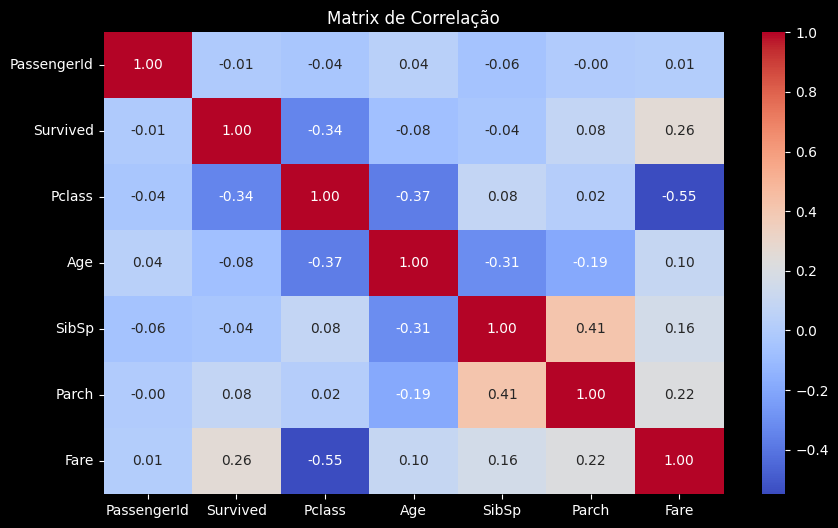

In [240]:
# plotando o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(matrix_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.style.use('dark_background')
plt.title("Matrix de Correlação")
plt.show()

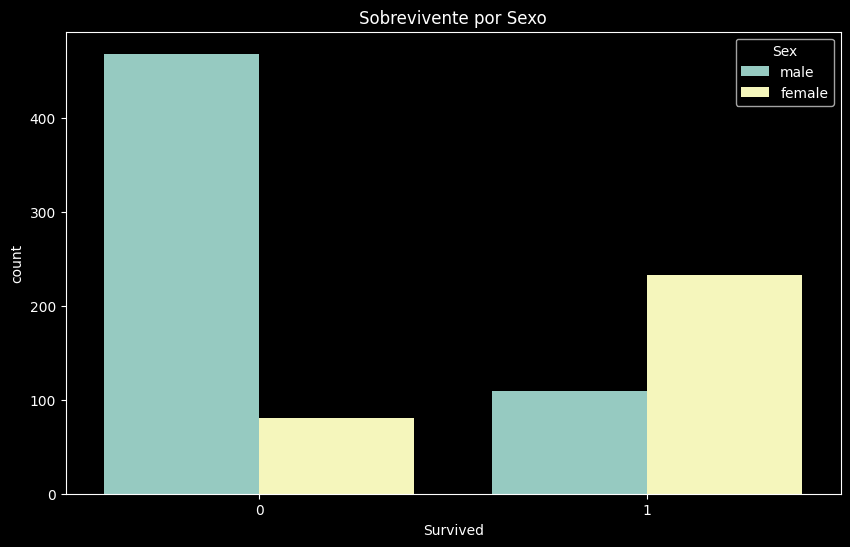

In [241]:
# visualização da relação entre sobrevivência o sexo dos passageiros
plt.figure(figsize=(10, 6 ))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Sobrevivente por Sexo')
plt.style.use('dark_background')
plt.show()

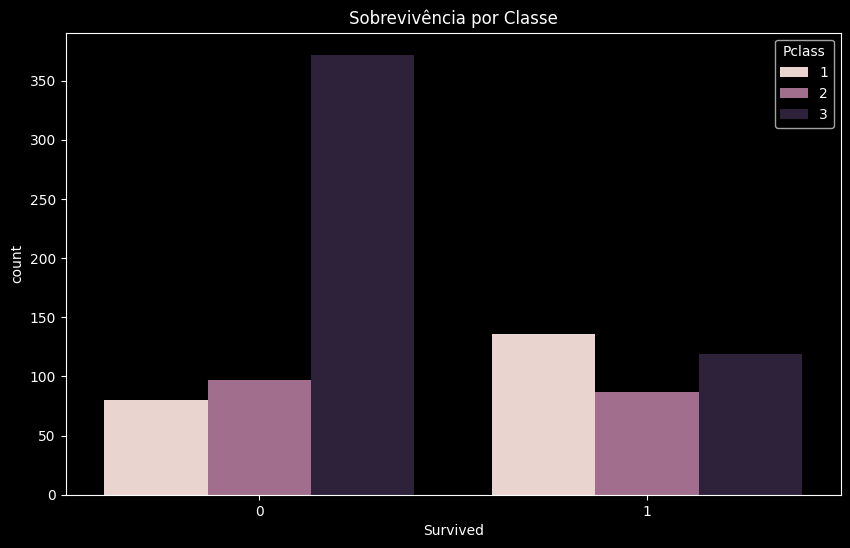

In [242]:
# sobrevivência por Classe
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.style.use('dark_background')
plt.title('Sobrevivência por Classe')
plt.show()

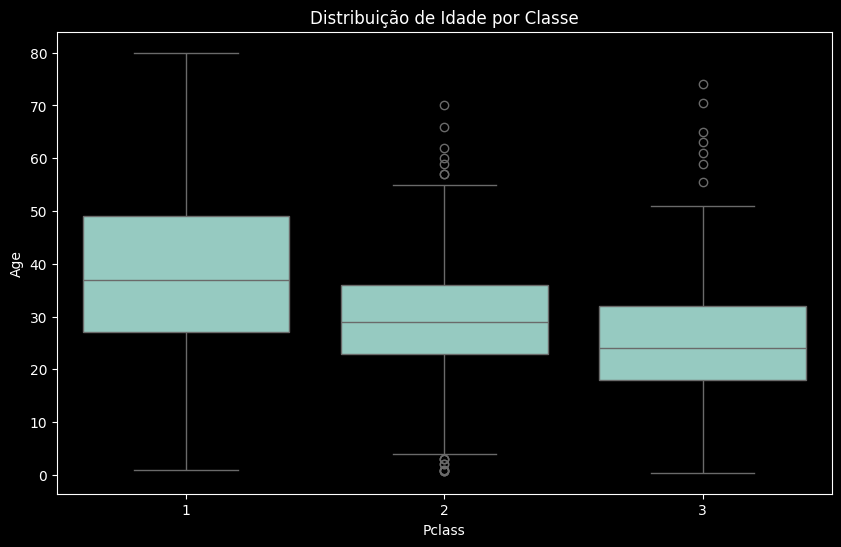

In [243]:
# Distribuição de Idade por Classe
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.style.use('dark_background')
plt.title('Distribuição de Idade por Classe')
plt.show()

### Separar em 'treino' e 'teste' e a variável 'target' das features

In [244]:
x = df.drop(columns=['Survived'], axis=1) # tira a coluna de x e deixa ela em y
y = df['Survived']

In [276]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

In [246]:
train_x.shape

(712, 11)

In [247]:
test_x.shape

(179, 11)

### Excluindo colunas que não utilizaremos no modelo

In [301]:
train_x = train_x.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [302]:
train_x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
331,0.566474,0.055628,True,False,False,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,True
733,0.283740,0.025374,False,True,False,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,True
382,0.396833,0.015469,False,False,True,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,True
704,0.321438,0.015330,False,False,True,False,True,False,True,False,...,True,False,False,False,False,False,False,False,False,True
813,0.070118,0.061045,False,False,True,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


### Verificando os problemas de Valor Vazio

In [303]:
pd.isna(train_x).sum().to_frame("Valor Vazio")

,Valor Vazio
Age,0
Fare,0
Pclass_1,0
Pclass_2,0
Pclass_3,0
Sex_female,0
Sex_male,0
SibSp_0,0
SibSp_1,0
SibSp_2,0


In [304]:
# groupby
train_x.groupby('Age').size()

Age
0.000000    1
0.003141    1
0.004147    2
0.005152    1
0.006283    1
           ..
0.811510    1
0.874340    2
0.880623    1
0.924604    1
1.000000    1
Length: 84, dtype: int64

In [252]:
# fazendo um groupby com função de agregação
#train_x.groupby('Age').agg({'Age' : np.mean, 'Age': np.size})



In [305]:
# USANDO A MÉDIA DO TREINO
train_x['Age'].fillna(train_x['Age'].mean(), inplace=True)
test_x['Age'].fillna(train_x['Age'].mean(), inplace=True)

C:\Users\arthu\AppData\Local\Temp\ipykernel_11288\3808195061.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_x['Age'].fillna(train_x['Age'].mean(), inplace=True)
C:\Users\arthu\AppData\Local\Temp\ipykernel_11288\3808195061.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [254]:
# utilizando a 'moda' na coluna 'Embarked'
train_x['Embarked'].fillna(train_x['Embarked'].mode()[0], inplace=True) # inplace para alterar o df
# USAR A MODA DO TREINO!
test_x['Embarked'].fillna(train_x['Embarked'].mode()[0], inplace=True)

C:\Users\arthu\AppData\Local\Temp\ipykernel_11288\1977415109.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_x['Embarked'].fillna(train_x['Embarked'].mode()[0], inplace=True) # inplace para alterar o df
C:\Users\arthu\AppData\Local\Temp\ipykernel_11288\1977415109.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

In [306]:
pd.isna(train_x).sum().to_frame("Valor Vazio")

,Valor Vazio
Age,0
Fare,0
Pclass_1,0
Pclass_2,0
Pclass_3,0
Sex_female,0
Sex_male,0
SibSp_0,0
SibSp_1,0
SibSp_2,0


### Tratar as variáveis numéricas (caso tenham medidas diferentes)

In [307]:
# duas colunas 'estranhas' 
train_x[['Age', 'Fare']]

,Age,Fare
331,0.566474,0.055628
733,0.283740,0.025374
382,0.396833,0.015469
704,0.321438,0.015330
813,0.070118,0.061045
...,...,...
106,0.258608,0.014932
270,0.365404,0.060508
860,0.509927,0.027538
435,0.170646,0.234224


In [308]:
# transformando esses dados com o MinMaxScaler
train_x[['Age', 'Fare']] = MinMaxScaler().fit_transform(train_x[['Age', 'Fare']])
test_x[['Age', 'Fare']] = MinMaxScaler().fit_transform(test_x[['Age', 'Fare']])

In [309]:
train_x[['Age', 'Fare']] # facilita para o treinamento de modelo

,Age,Fare
331,0.566474,0.055628
733,0.283740,0.025374
382,0.396833,0.015469
704,0.321438,0.015330
813,0.070118,0.061045
...,...,...
106,0.258608,0.014932
270,0.365404,0.060508
860,0.509927,0.027538
435,0.170646,0.234224


In [259]:
# observando os dados de treino
train_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
248,1,male,0.457960,1,1,0.102579,S
797,3,female,0.382327,0,0,0.016949,S
489,3,male,0.105004,1,1,0.031035,S
850,3,male,0.041977,4,2,0.061045,S
22,3,female,0.180638,0,0,0.015672,Q
...,...,...,...,...,...,...,...
420,3,male,0.361567,0,0,0.015412,C
208,3,female,0.193243,0,0,0.015127,Q
251,3,female,0.357116,1,1,0.020421,S
126,3,male,0.361567,0,0,0.015127,Q


In [313]:
# transformando variáveis categóricas em numéricas
# Verificar se as colunas existem antes de transformar
print("Colunas em train_x antes de get_dummies:", train_x.columns)
print("Colunas em test_x antes de get_dummies:", test_x.columns)

# Checando especificamente as colunas desejadas
cols_to_dummy = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
missing_in_train = [col for col in cols_to_dummy if col not in train_x.columns]
missing_in_test = [col for col in cols_to_dummy if col not in test_x.columns]

if missing_in_train:
    print("Faltando em train_x:", missing_in_train)
if missing_in_test:
    print("Faltando em test_x:", missing_in_test)

# Aplicando get_dummies apenas se todas as colunas estiverem presentes
if not missing_in_train and not missing_in_test:
    train_x = pd.get_dummies(train_x, columns=cols_to_dummy)
    test_x = pd.get_dummies(test_x, columns=cols_to_dummy)
    train_x, test_x = train_x.align(test_x, join='inner', axis=1)
else:
    print("Corrija a ausência de colunas antes de continuar")

Colunas em train_x antes de get_dummies: Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')
Colunas em test_x antes de get_dummies: Index(['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1',
       'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0',
       'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
Faltando em train_x: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
Faltando em test_x: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
Corrija a ausência de colunas antes de continuar


In [311]:
test_x.shape

(179, 28)

In [312]:
train_x.shape

(712, 24)

In [314]:
# Alinhar train_x e test_x para terem as mesmas colunas
train_x, test_x = train_x.align(test_x, join='inner', axis=1)

In [315]:
# Opcional: Verificar novamente as colunas após o alinhamento
print("Colunas em train_x após alinhamento:", train_x.columns)
print("Colunas em test_x após alinhamento:", test_x.columns)

Colunas em train_x após alinhamento: Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')
Colunas em test_x após alinhamento: Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


### Treinando o modelo com os principais algorítimos supervisionados de Classificação  

In [316]:
regressao_logistica = LogisticRegression(solver='lbfgs', max_iter=10000).fit(train_x, train_y)
LDA = LinearDiscriminantAnalysis().fit(train_x, train_y)
arvore_decisao = DecisionTreeClassifier().fit(train_x, train_y)
KN = KNeighborsClassifier().fit(train_x, train_y)
SVM = SVC().fit(train_x, train_y)
RF = RandomForestClassifier().fit(train_x, train_y)

### Acurácia, Recall e Precisão do treino

In [317]:
metricas = {
    'Accuracy': [regressao_logistica.score(train_x, train_y),
                 LDA.score(train_x, train_y),
                 arvore_decisao.score(train_x, train_y),
                 KN.score(train_x, train_y),
                 SVM.score(train_x, train_y),
                 RF.score(train_x, train_y)],
    
    'Precisão': [precision_score(train_y, regressao_logistica.predict(train_x)),
                 precision_score(train_y, LDA.predict(train_x)),
                 precision_score(train_y, arvore_decisao.predict(train_x)),
                 precision_score(train_y, KN.predict(train_x)),
                 precision_score(train_y, SVM.predict(train_x)),
                 precision_score(train_y, RF.predict(train_x))],

    'Recall': [recall_score(train_y, regressao_logistica.predict(train_x)),
               recall_score(train_y, LDA.predict(train_x)),
               recall_score(train_y, arvore_decisao.predict(train_x)),
               recall_score(train_y, KN.predict(train_x)),
               recall_score(train_y, SVM.predict(train_x)),
               recall_score(train_y, RF.predict(train_x))]

}

dados = pd.DataFrame(metricas, columns= ['Accuracy', 'Precisão', 'Recall'], index= ['Regressão Logística', 'LDA', 
                                        'Árvore de decisão', 'KN', 'SVM', 'RF'])

In [318]:
dados

,Accuracy,Precisão,Recall
Regressão Logística,0.806180,0.773109,0.686567
LDA,0.803371,0.773504,0.675373
Árvore de decisão,0.980337,0.996094,0.951493
KN,0.856742,0.857759,0.742537
SVM,0.830056,0.906077,0.611940
RF,0.980337,0.988462,0.958955


In [319]:
# Certifique-se de que train_y e test_y estão alinhados com seus respectivos conjuntos X
print("train_y shape:", train_y.shape)
print("test_y shape:", test_y.shape)
print("train_x shape:", train_x.shape)
print("test_x shape:", test_x.shape)

train_y shape: (712,)
test_y shape: (179,)
train_x shape: (712, 24)
test_x shape: (179, 24)


### Dados teste    

In [321]:
metricas_teste = {
    'Accuracy': [
        regressao_logistica.score(test_x, test_y),
        LDA.score(test_x, test_y),
        arvore_decisao.score(test_x, test_y),
        KN.score(test_x, test_y),
        SVM.score(test_x, test_y),
        RF.score(test_x, test_y)
    ],
    'Precisão': [
        precision_score(test_y, regressao_logistica.predict(test_x)),
        precision_score(test_y, LDA.predict(test_x)),
        precision_score(test_y, arvore_decisao.predict(test_x)),
        precision_score(test_y, KN.predict(test_x)),
        precision_score(test_y, SVM.predict(test_x)),
        precision_score(test_y, RF.predict(test_x))
    ],
    'Recall': [
        recall_score(test_y, regressao_logistica.predict(test_x)),
        recall_score(test_y, LDA.predict(test_x)),
        recall_score(test_y, arvore_decisao.predict(test_x)),
        recall_score(test_y, KN.predict(test_x)),
        recall_score(test_y, SVM.predict(test_x)),
        recall_score(test_y, RF.predict(test_x))
    ]
}

dados_teste = pd.DataFrame(metricas_teste, columns=['Accuracy', 'Precisão', 'Recall'], index=['Regressão Logística', 'LDA', 'Árvore de Decisão', 'KN', 'SVM', 'RF'])

dados_teste

,Accuracy,Precisão,Recall
Regressão Logística,0.798883,0.787879,0.702703
LDA,0.793296,0.768116,0.716216
Árvore de Decisão,0.765363,0.750000,0.648649
KN,0.804469,0.819672,0.675676
SVM,0.798883,0.827586,0.648649
RF,0.759777,0.781818,0.581081


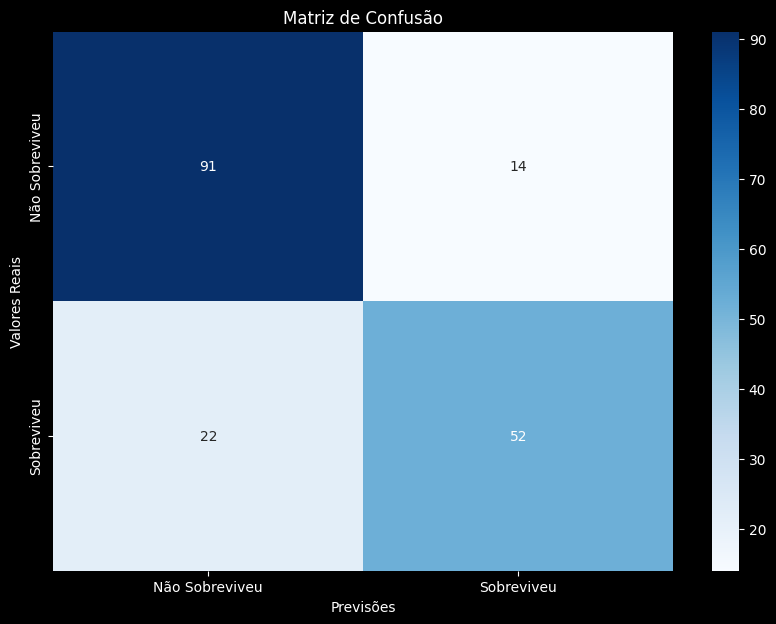

In [325]:
from sklearn.metrics import confusion_matrix

# Gerar previsões com o modelo
y_previsoes = regressao_logistica.predict(test_x)

# Calcular a matriz de confusão
cm = confusion_matrix(test_y, y_pred)

# Criar o gráfico de confusão usando matplotlib e seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Sobreviveu', 'Sobreviveu'], yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()

In [324]:
#"""Explicação do Código
#confusion_matrix(test_y, y_pred): Calcula a matriz de confusão a partir dos valores reais (test_y) 
# e das previsões do modelo (y_pred).

#sns.heatmap(): Cria um gráfico de calor para a matriz de confusão. annot=True mostra os 
# números dentro do gráfico, fmt='d' formata esses números como inteiros, e cmap='Blues' usa o mapa de cores azul. Os xticklabels e yticklabels são usados para nomear os eixos com as classes previstas.

#Bibliotecas Necessárias
#Matplotlib: Usada para criar gráficos em Python.
#Seaborn: Uma biblioteca de visualização de dados em Python baseada no matplotlib, oferece 
# uma interface de alto nível para gráficos estatísticos atraentes.""""

In [326]:
#Plotar um gráfico da curva ROC (Receiver Operating Characteristic) é uma ótima maneira de avaliar a 
# performance de um modelo de classificação em termos de sua capacidade de discriminar entre as classes. 
#Para plotar a curva ROC, você precisará calcular a taxa de 
# verdadeiros positivos (TPR) e a taxa de falsos positivos (FPR) em diferentes limiares de decisão.

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [328]:
# Gerar probabilidades das previsões
y_scores = regressao_logistica.predict_proba(test_x)[:, 1]  # Probabilidades da classe positiva

In [329]:
# Calcular FPR, TPR, e limiares
fpr, tpr, thresholds = roc_curve(test_y, y_scores)

In [330]:
# Calcular a área sob a curva ROC
roc_auc = auc(fpr, tpr)

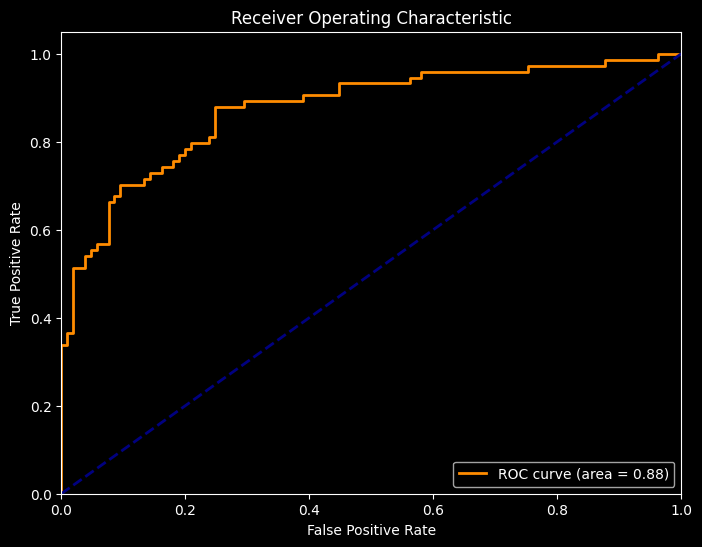

In [331]:
# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Interpretando os Resultados

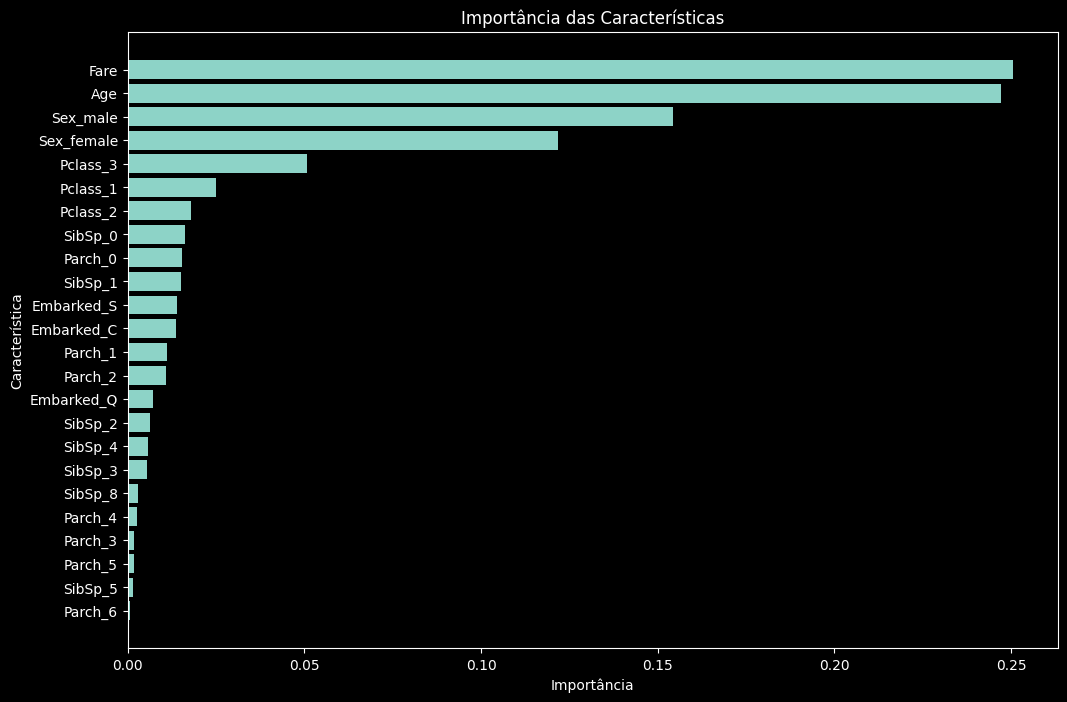

In [332]:
#   'RF' é o nosso modelo de floresta aleatória treinado
feature_importances = RF.feature_importances_
features = test_x.columns

# Criar um DataFrame para visualizar a importância
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plotar as importâncias das características
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Característica')
plt.title('Importância das Características')
plt.gca().invert_yaxis()  # Inverter o eixo y para melhor visualização
plt.show()
